In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df=pd.read_csv(r"/content/dataset.csv")

In [5]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [7]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
df.columns=df.columns.str.lower()

In [9]:
df.columns=df.columns.str.replace(" ","_")

In [10]:
df.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

In [11]:
df.shape

(112634, 17)

In [12]:
df.isnull().sum()

,0
vin_(1-10),0
county,0
city,0
state,0
postal_code,0
model_year,0
make,0
model,20
electric_vehicle_type,0
clean_alternative_fuel_vehicle_(cafv)_eligibility,0


In [13]:
model_count=df["model"].value_counts()
model_count

,count
model,
MODEL 3,23135
MODEL Y,17142
LEAF,12880
MODEL S,7377
BOLT EV,4910
...,...
745LE,2
S-10 PICKUP,1
SOLTERRA,1


In [14]:
utility_counts=df["electric_utility"].value_counts()
utility_counts

,count
electric_utility,
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),40247
PUGET SOUND ENERGY INC,22172
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),21447
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA),6522
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,5053
...,...
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY,1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY,1
CITY OF SEATTLE - (WA),1


In [15]:
location_counts=df["vehicle_location"].value_counts()
location_counts

,count
vehicle_location,
POINT (-122.13158 47.67858),2916
POINT (-122.2066 47.67887),2059
POINT (-122.1872 47.61001),2001
POINT (-122.31765 47.70013),1880
POINT (-122.12096 47.55584),1852
...,...
POINT (-124.33152 48.05431),1
POINT (-77.41203 39.41574),1
POINT (-123.61022 46.35588),1


In [16]:
df.legislative_district.value_counts()
df.legislative_district

,legislative_district
0,NaN
1,NaN
2,15.0
3,39.0
4,38.0
...,...
112629,45.0
112630,40.0
112631,34.0
112632,47.0


Handling Missing Values

In [17]:
#Handling missing values
df.model = df.model.fillna(df.model.mode()[0])
df.legislative_district = df.legislative_district.fillna(df.legislative_district.mean())
df.vehicle_location = df.vehicle_location.fillna(df.vehicle_location.mode()[0])
df.electric_utility = df.electric_utility.fillna(df.electric_utility.mode()[0])

In [18]:
df.isnull().sum()

,0
vin_(1-10),0
county,0
city,0
state,0
postal_code,0
model_year,0
make,0
model,0
electric_vehicle_type,0
clean_alternative_fuel_vehicle_(cafv)_eligibility,0


Univariate Analysis

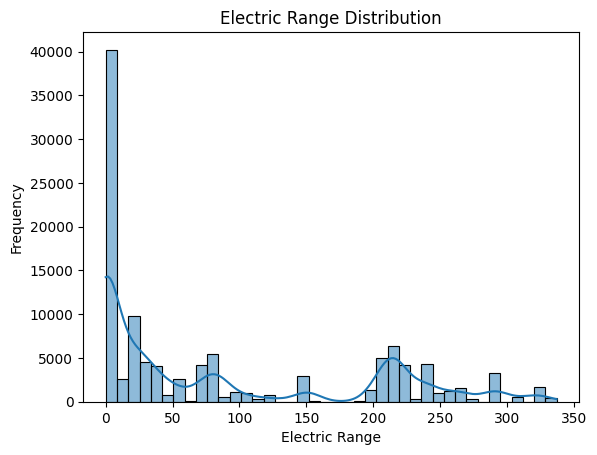

In [19]:
sns.histplot(data=df.electric_range, kde=True)
plt.title("Electric Range Distribution")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.show()

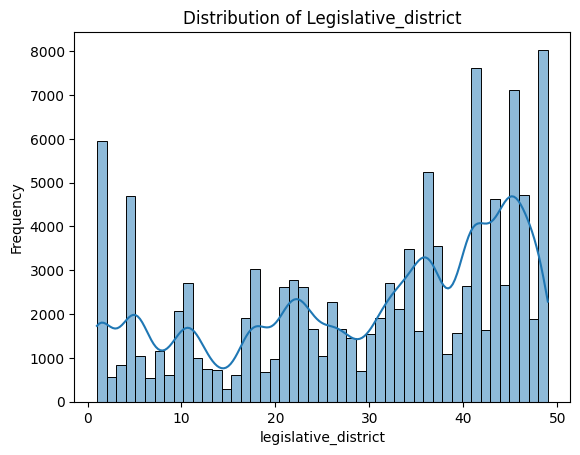

In [20]:
sns.histplot(data=df.legislative_district, kde=True)
plt.title("Distribution of Legislative_district")
plt.xlabel("legislative_district")
plt.ylabel("Frequency")
plt.show()

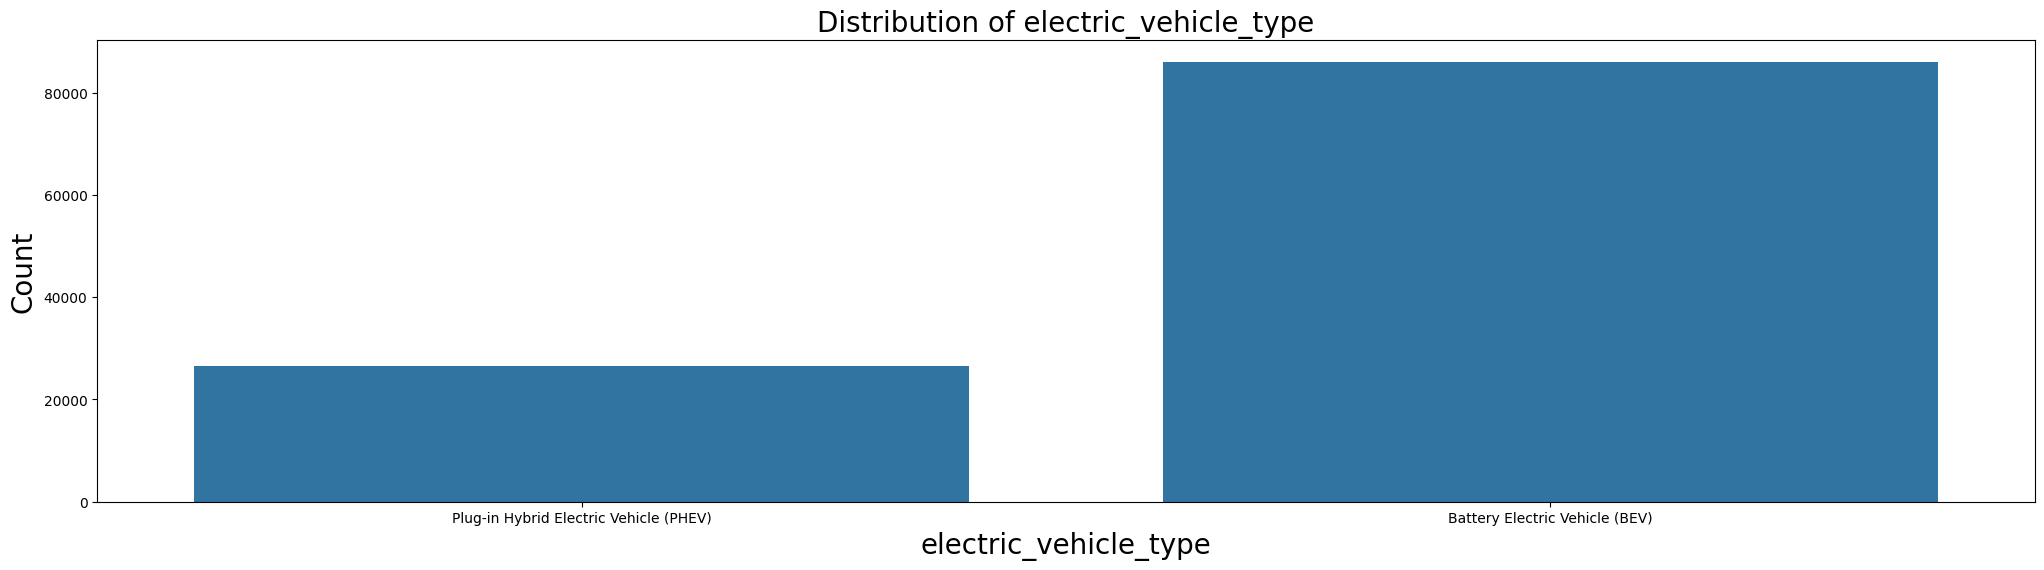

In [21]:
plt.figure(figsize=(25,6))
sns.countplot(x="electric_vehicle_type",data=df)
plt.title("Distribution of electric_vehicle_type",fontsize = 20)
plt.xlabel("electric_vehicle_type",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


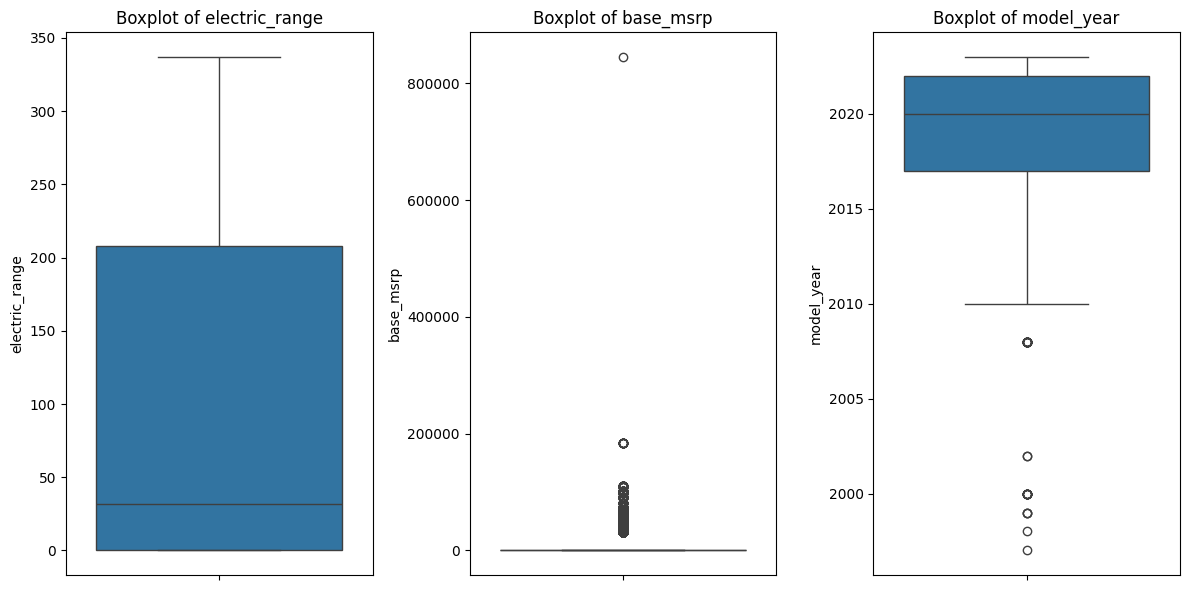

In [22]:
numerical_columns = ['electric_range', 'base_msrp', 'model_year']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


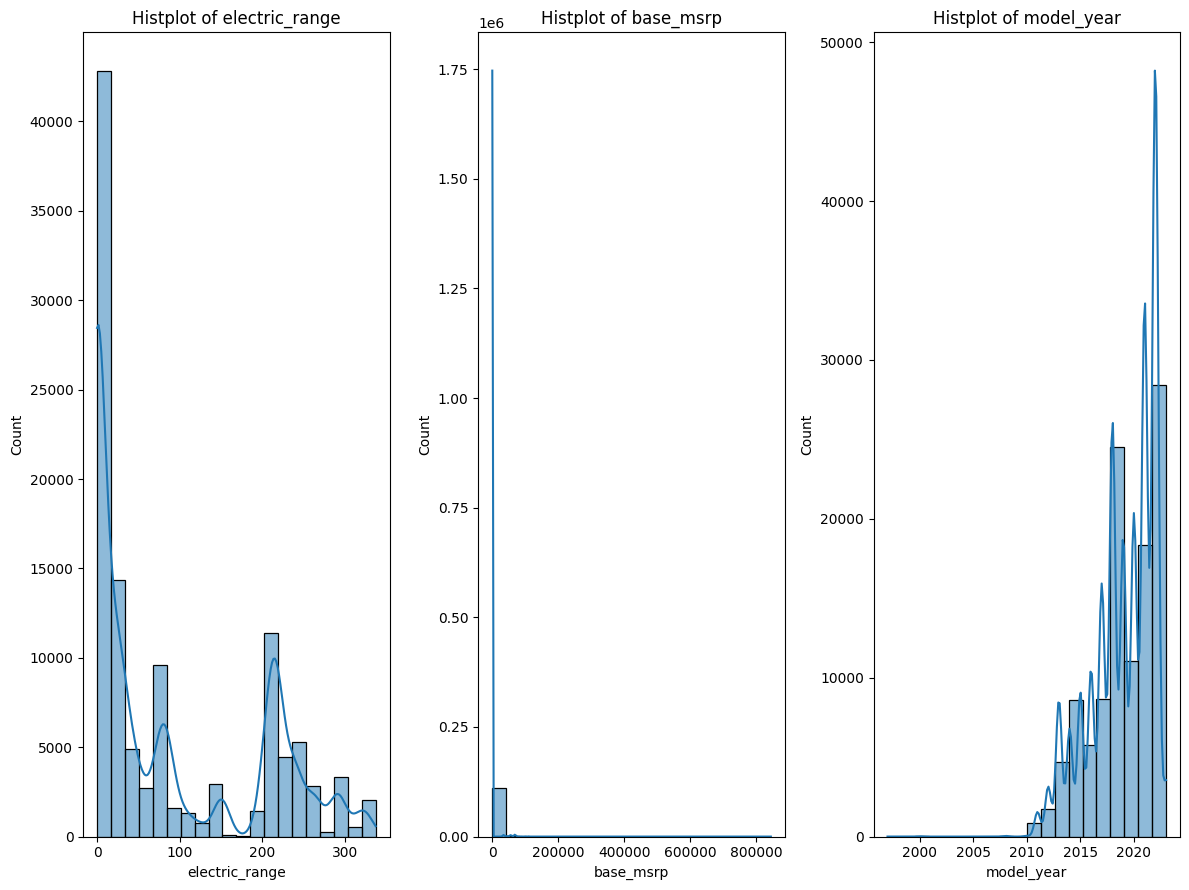

In [23]:
numerical_columns = ['electric_range', 'base_msrp', 'model_year']

plt.figure(figsize=(12,9))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histplot of {col}')

plt.tight_layout()
plt.show()


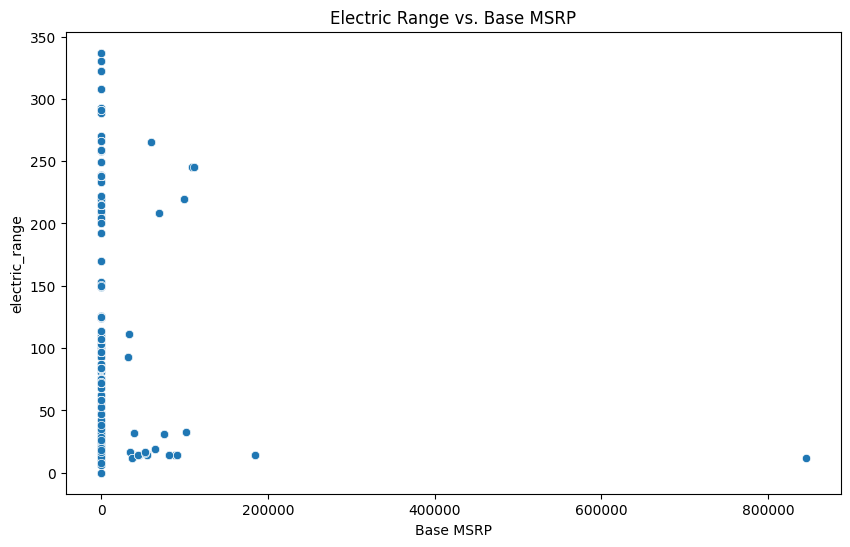

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="base_msrp", y="electric_range", data=df)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Base MSRP')
plt.show()

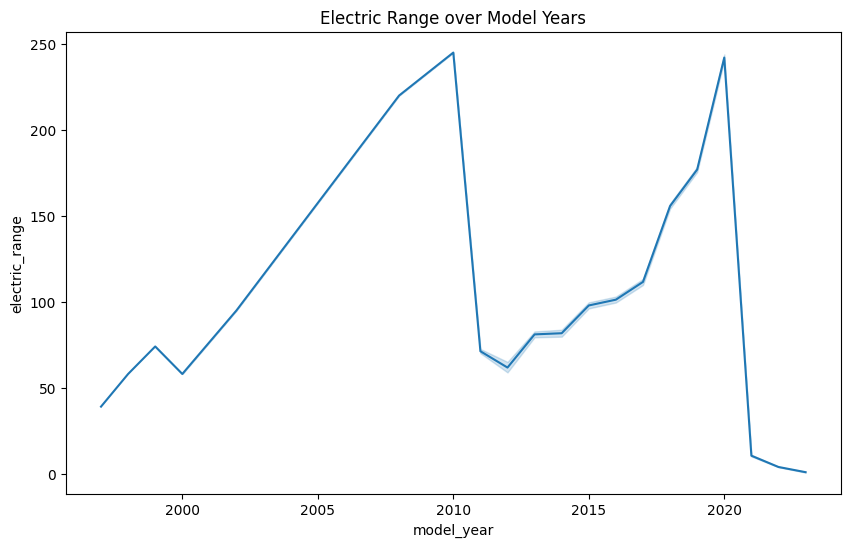

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="model_year", y="electric_range", data=df)
plt.title('Electric Range over Model Years')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


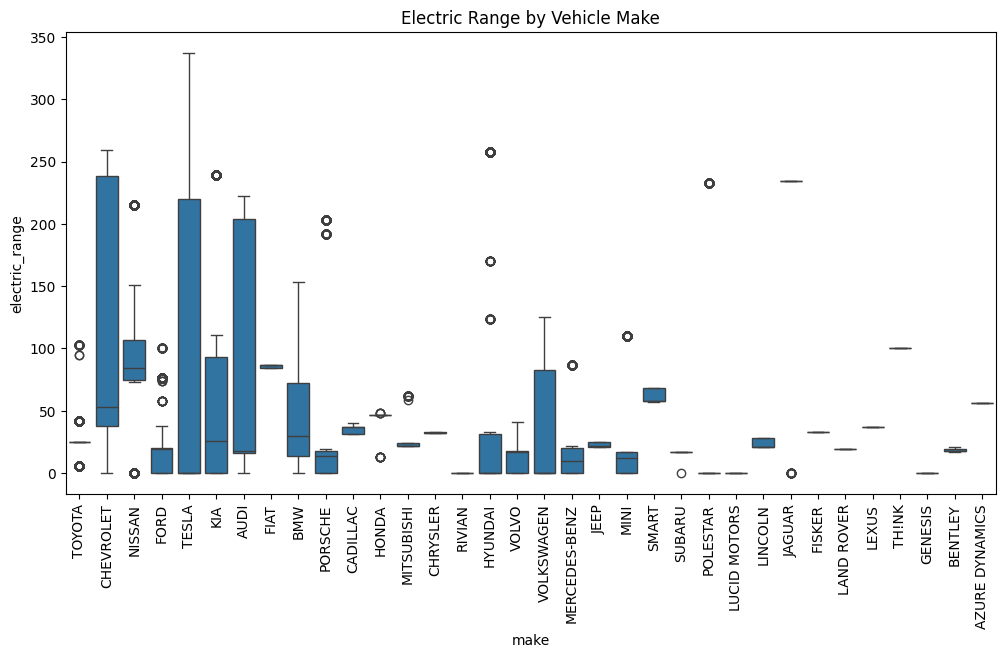

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="make", y="electric_range", data=df)
plt.xticks(rotation=90)
plt.title('Electric Range by Vehicle Make')
plt.show()

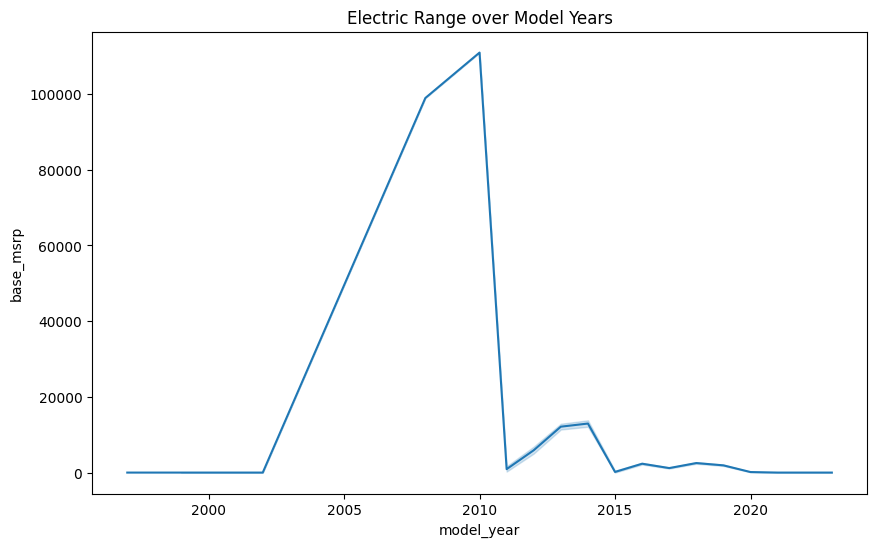

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="model_year", y="base_msrp", data=df)
plt.title('Electric Range over Model Years')
plt.show()

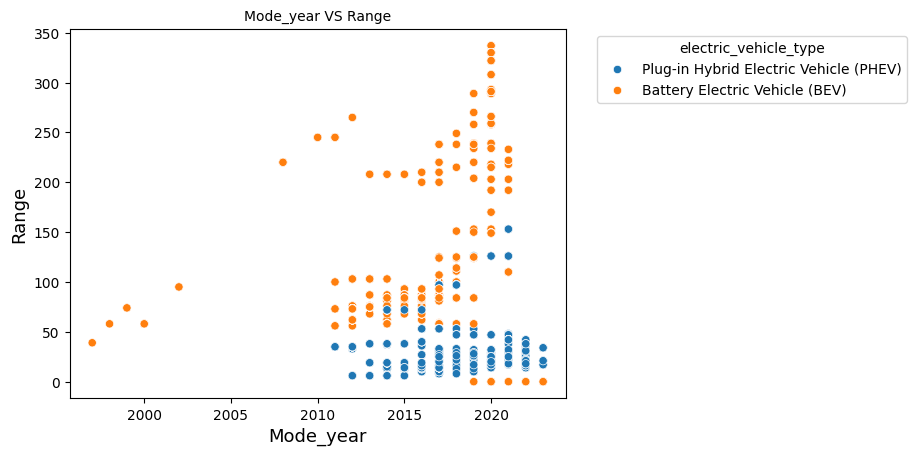

In [32]:
sns.scatterplot(x="model_year", y="electric_range",data=df, hue = 'electric_vehicle_type')
plt.title("Mode_year VS Range",fontsize = 10)
plt.xlabel("Mode_year",fontsize = 13)
plt.ylabel("Range",fontsize = 13)
plt.legend(title = "electric_vehicle_type", bbox_to_anchor = (1.05,1), loc = "upper left")
plt.show()

Create a Choropleth using plotly.express to display the number of EV vehicles based on location

In [33]:
import plotly.express as px

# Group the data by state and count the number of EVs
count_by_state = df.groupby("state").size().reset_index(name="count")

# Create the choropleth map
fig = px.choropleth(
    count_by_state,
    locations="state",
    color="count",
    locationmode="USA-states",
    scope="usa",
    labels={"count": "NO OF EV's"},  # Correct label mapping
    title="Number of EVs by State"
)

# Update layout for the map (correct syntax)
fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),  # Setting transparent background
    title_x=0.5  # Center the title
)

# Show the figure
fig.show()

In [36]:
pip install bar-chart-race


In [37]:
import bar_chart_race as bcr

In [39]:
car_per_year = df.groupby(['make', 'model_year']).size().reset_index(name='number_of_Vehicles')

# Display the resulting DataFrame for verification
print(car_per_year)

      make  model_year  number_of_Vehicles
0     AUDI        2016                 214
1     AUDI        2017                 187
2     AUDI        2018                 174
3     AUDI        2019                 392
4     AUDI        2020                 224
..     ...         ...                 ...
204  VOLVO        2019                 190
205  VOLVO        2020                 162
206  VOLVO        2021                 580
207  VOLVO        2022                 882
208  VOLVO        2023                  21

[209 rows x 3 columns]


In [40]:
import plotly.express as px

# Create the animated racing bar plot with annotations
fig = px.bar(car_per_year,
             y='make',  # Place Make on y-axis
             x='number_of_Vehicles',  # Place the count of EV vehicles on the x-axis
             color='make',  # Color each make differently
             animation_frame='model_year',  # Create animation by year
             orientation='h',  # Horizontal bar chart
             title='EV Makes and their Count Over the Years',
             labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
             range_x=[0, 3000]
            )

# Update traces for displaying values
fig.update_traces(texttemplate='%{x}',  # Display the actual x-axis values (Number_of_Vehicles)
                  textposition='outside',  # Place the text outside the bars
                  textfont_size=16)  # Adjust the font size for better readability

# Adjust the layout for improved visibility and emphasis on movement
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray'),  # Show grid for better visibility
    yaxis_title='EV Makes',
    xaxis_title='Number of EV Vehicles',
    showlegend=False,  # Hide legend as it's not necessary for this chart
    title_x=0.5,  # Center title
    title_font=dict(size=20),  # Increase title font size
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins
    width=800,  # Set a fixed width
    height=600  # Set a fixed height
)

# Show the plot
fig.show()
